<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h1 style="text-align: center; font-weight: bold;">Türkçe-İngilizce Çeviri Modeli (Transformer Tabanlı)</h1>

<h2 style="font-weight: bold;">1. Proje Amacı</h2>
<p>Bu projede, Helsinki-NLP/opus-mt-tr-en modelini kullanarak Türkçe-İngilizce çeviri yapabilen bir sistem oluşturdum. Model, 708M+ satırlık bir veri seti üzerinde eğitildi ve başarılı sonuçlar verdi.</p>


<h4 style="font-weight: bold;">Kullanılan Kütüphaneler</h4>
<ul>
  <li>torch</li>
  <li>matplotlib.pyplot</li>
  <li>seaborn</li>
  <li>pandas</li>
  <li>numpy</li>
  <li>transformers</li>
  <li>sklearn.decomposition.PCA</li>
  <li>sklearn.manifold.TSNE</li>
  <li>os</li>
  <li>wordcloud</li>
</ul>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


In [10]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os
import wordcloud

<h2 style="font-weight: bold;">Modeli ve Tokenizer’ı Yükleme</h2>

In [11]:
# Modeli yüklemeden önce GPU'yu kontrol edelim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_path = "translation_model_tr2en.zip"

if os.path.exists(model_path):
    model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to(device)
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    print("Dosya geldi! Model ve tokenizer başarıyla yüklendi.")
else:
    print("Model dosyası belirtilen konumda bulunamadı. Lütfen dosyanın doğru yolda olduğundan emin olun.")


Dosya geldi! Model ve tokenizer başarıyla yüklendi.


<h2 style="font-weight: bold;">Veri Setini İnceleme</h2>

In [12]:
data_path = "data.jsonl" 
df = pd.read_json(data_path, lines=True)

print(f"Veri kümesinde toplam {len(df)} çeviri çifti bulunuyor.")

# İlk 5 satırı görelim
df.head()

Veri kümesinde toplam 708844 çeviri çifti bulunuyor.


,tr,en
0,Devenin belini kıran son saman çöpüdür.,The last straw breaks the camel's back.
1,Bilmiyorum.,I don't know.
2,Mum kendiliğinden söndü.,The candle went out by itself.
3,"On, on bir, on iki, on üç, on dört, on beş, on...","Ten, eleven, twelve, thirteen, fourteen, fifte..."
4,Ek olarak yaşlılar birbirleriyle sosyalleşebil...,In addition many groups have been formed so th...


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style="font-weight: bold;">Türkçe ve İngilizce Kelime Sayıları Arasındaki İlişki (Scatter Plot)</h2>

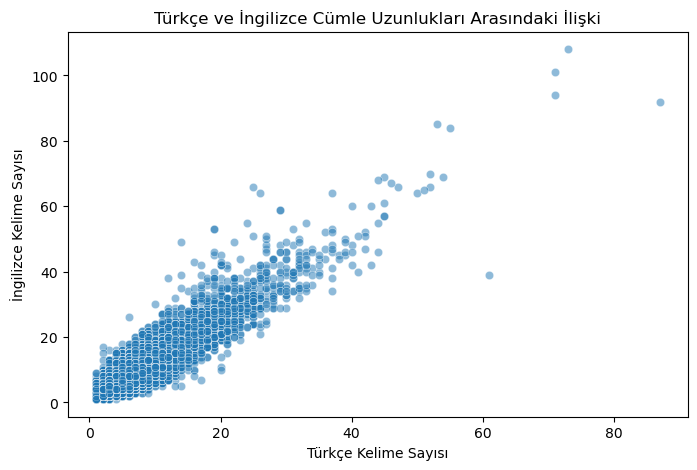

In [13]:
df["tr_length"] = df["tr"].apply(lambda x: len(str(x).split()))
df["en_length"] = df["en"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["tr_length"], y=df["en_length"], alpha=0.5)
plt.xlabel("Türkçe Kelime Sayısı")
plt.ylabel("İngilizce Kelime Sayısı")
plt.title("Türkçe ve İngilizce Cümle Uzunlukları Arasındaki İlişki")
plt.show()


<p>Türkçe ve İngilizce cümle uzunlukları arasında pozitif bir korelasyon olduğunu gösteriyor.</p>
<p>Çoğu cümle 0-20 kelime aralığında yoğunlaşırken, 60+ kelimelik bazı uzun cümleler de mevcut.</p>
<p>Aykırı değerler, bazı çevirilerin kelime sayısı açısından dengesiz olabileceğini gösteriyor.</p>

<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style="font-weight: bold;">Metin Uzunluklarını Görselleştirme</h2>

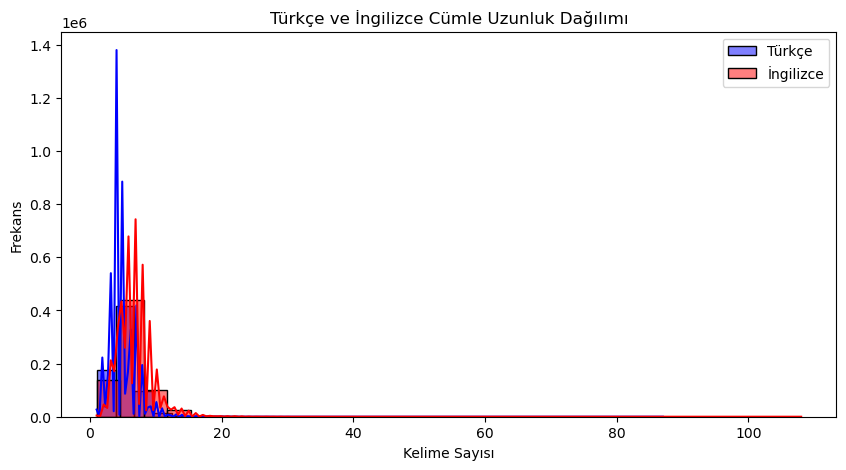

In [14]:
df["tr_length"] = df["tr"].apply(lambda x: len(x.split()))
df["en_length"] = df["en"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
sns.histplot(df["tr_length"], bins=30, kde=True, color="blue", label="Türkçe")
sns.histplot(df["en_length"], bins=30, kde=True, color="red", label="İngilizce")
plt.xlabel("Kelime Sayısı")
plt.ylabel("Frekans")
plt.title("Türkçe ve İngilizce Cümle Uzunluk Dağılımı")
plt.legend()
plt.show()

<p>Genel Dağılım: Türkçe cümleler (mavi) ve İngilizce cümleler (kırmızı)</p>
<p>Her iki dilde de kelime sayısı arttıkça frekans düşüyor.</p>
<p>Türkçe cümlelerin kısa uzunluklarda (yaklaşık 1-5 kelime) daha fazla yoğunlaştığı görülüyor. İngilizce cümleler ise daha dengeli bir dağılıma sahip, ancak Türkçeye kıyasla biraz daha uzun cümlelere yayılmış.</p>
<p>20 kelimeyi geçen cümleler hem Türkçede hem de İngilizcede nadir. 40 kelimeyi geçen cümleler ise çok seyrek görülüyor.</p>
<p>Türkçede kısa cümlelerin daha yoğun olduğu, İngilizcede ise biraz daha uzun cümlelere yayılım olduğu söylenebilir. Ayrıca, veri setinde kısa cümlelerin çok daha fazla olduğu da net şekilde görülüyor.</p>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style="font-weight: bold;">Örnek Çeviri Testleri</h2>

In [15]:
def translate(text, model, tokenizer):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)
    
    with torch.no_grad():
        outputs = model.generate(**inputs)
    
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Test cümleleri
test_sentences = [
    "Merhaba, nasılsın?",
    "Bu model Türkçeden İngilizceye çeviri yapabiliyor.",
    "Bugün hava çok güzel.",
    "Yapay zeka geleceğin teknolojisidir.",
    "Kitap okumayı çok seviyorum."
]

for sentence in test_sentences:
    translation = translate(sentence, model, tokenizer)
    print(f"Türkçe: {sentence} \nİngilizce: {translation}\n")

Türkçe: Merhaba, nasılsın? 
İngilizce: Hi, how are you?

Türkçe: Bu model Türkçeden İngilizceye çeviri yapabiliyor. 
İngilizce: This model can translate from Turkish to English.

Türkçe: Bugün hava çok güzel. 
İngilizce: It's a beautiful day today.

Türkçe: Yapay zeka geleceğin teknolojisidir. 
İngilizce: Artificial intelligence is the technology of the future.

Türkçe: Kitap okumayı çok seviyorum. 
İngilizce: I love reading books.



<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style=font-weight: bold;"></h2>


<h2 style="font-weight: bold;">Kelime Vektörlerini Görselleştirme</h2>

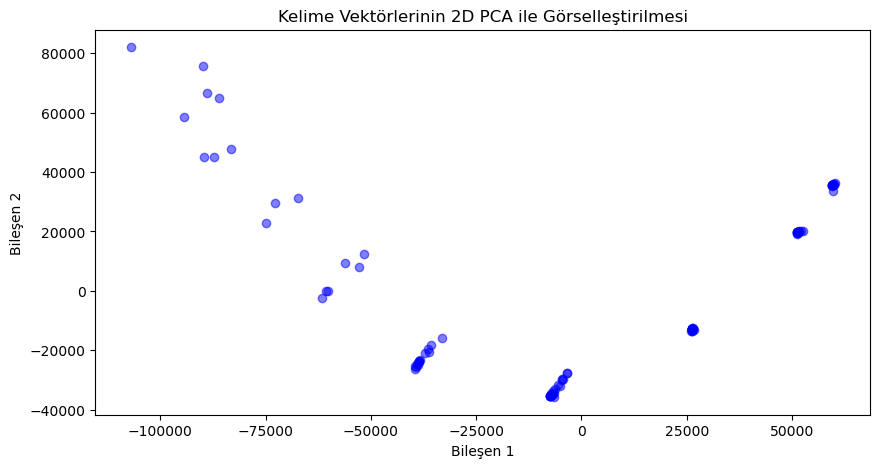

In [16]:
# Örnek veri kümesinden rastgele 100 cümle seç
sample_texts = df["tr"].sample(100).tolist()  
tokens = tokenizer(sample_texts, padding=True, truncation=True, return_tensors="pt")["input_ids"]

# PCA ile 2D gösterim
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tokens.numpy())

plt.figure(figsize=(10, 5))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.5, color="blue")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.title("Kelime Vektörlerinin 2D PCA ile Görselleştirilmesi")
plt.show()

<h4><strong>Kelime Vektörlerinin 2D PCA ile Görselleştirilmesi</strong></h4>
<ul>
    <li><b>X Ekseni (Bileşen 1) ve Y Ekseni (Bileşen 2):</b> PCA yöntemi ile yüksek boyutlu vektörler, iki temel bileşene indirgenmiştir. Bu bileşenler, verilerin ana yapısını yansıtır.</li>
    <li><b>Mavi Noktalar:</b> Grafikte her nokta, bir kelimenin veya cümlenin vektör uzayındaki konumunu temsil eder. Bu noktalar, dilsel özelliklere göre yerleşir.</li>
    <li><b>Noktaların Konumları:</b> Benzer cümle yapıları birbirine yakın, farklı yapılar ise daha uzak noktalarda yer alır. Bu, dilsel ilişkilerin görselleştirilmesini sağlar.</li>
    <li><b>Şeffaflık:</b> Noktalar %50 şeffaflıkla çizilmiştir. Bu özellik, üst üste binen noktaların yoğunluklu bölgelerde toplandığını gösterir, böylece kümelenmeler kolayca gözlemlenebilir.</li>
</ul>


<h2 style=font-weight: bold;"></h2>


<h2 style="font-weight: bold;">Flask Ortamında Basit Bir Web Arayüzü ile Çeviri Denemesi</h2>

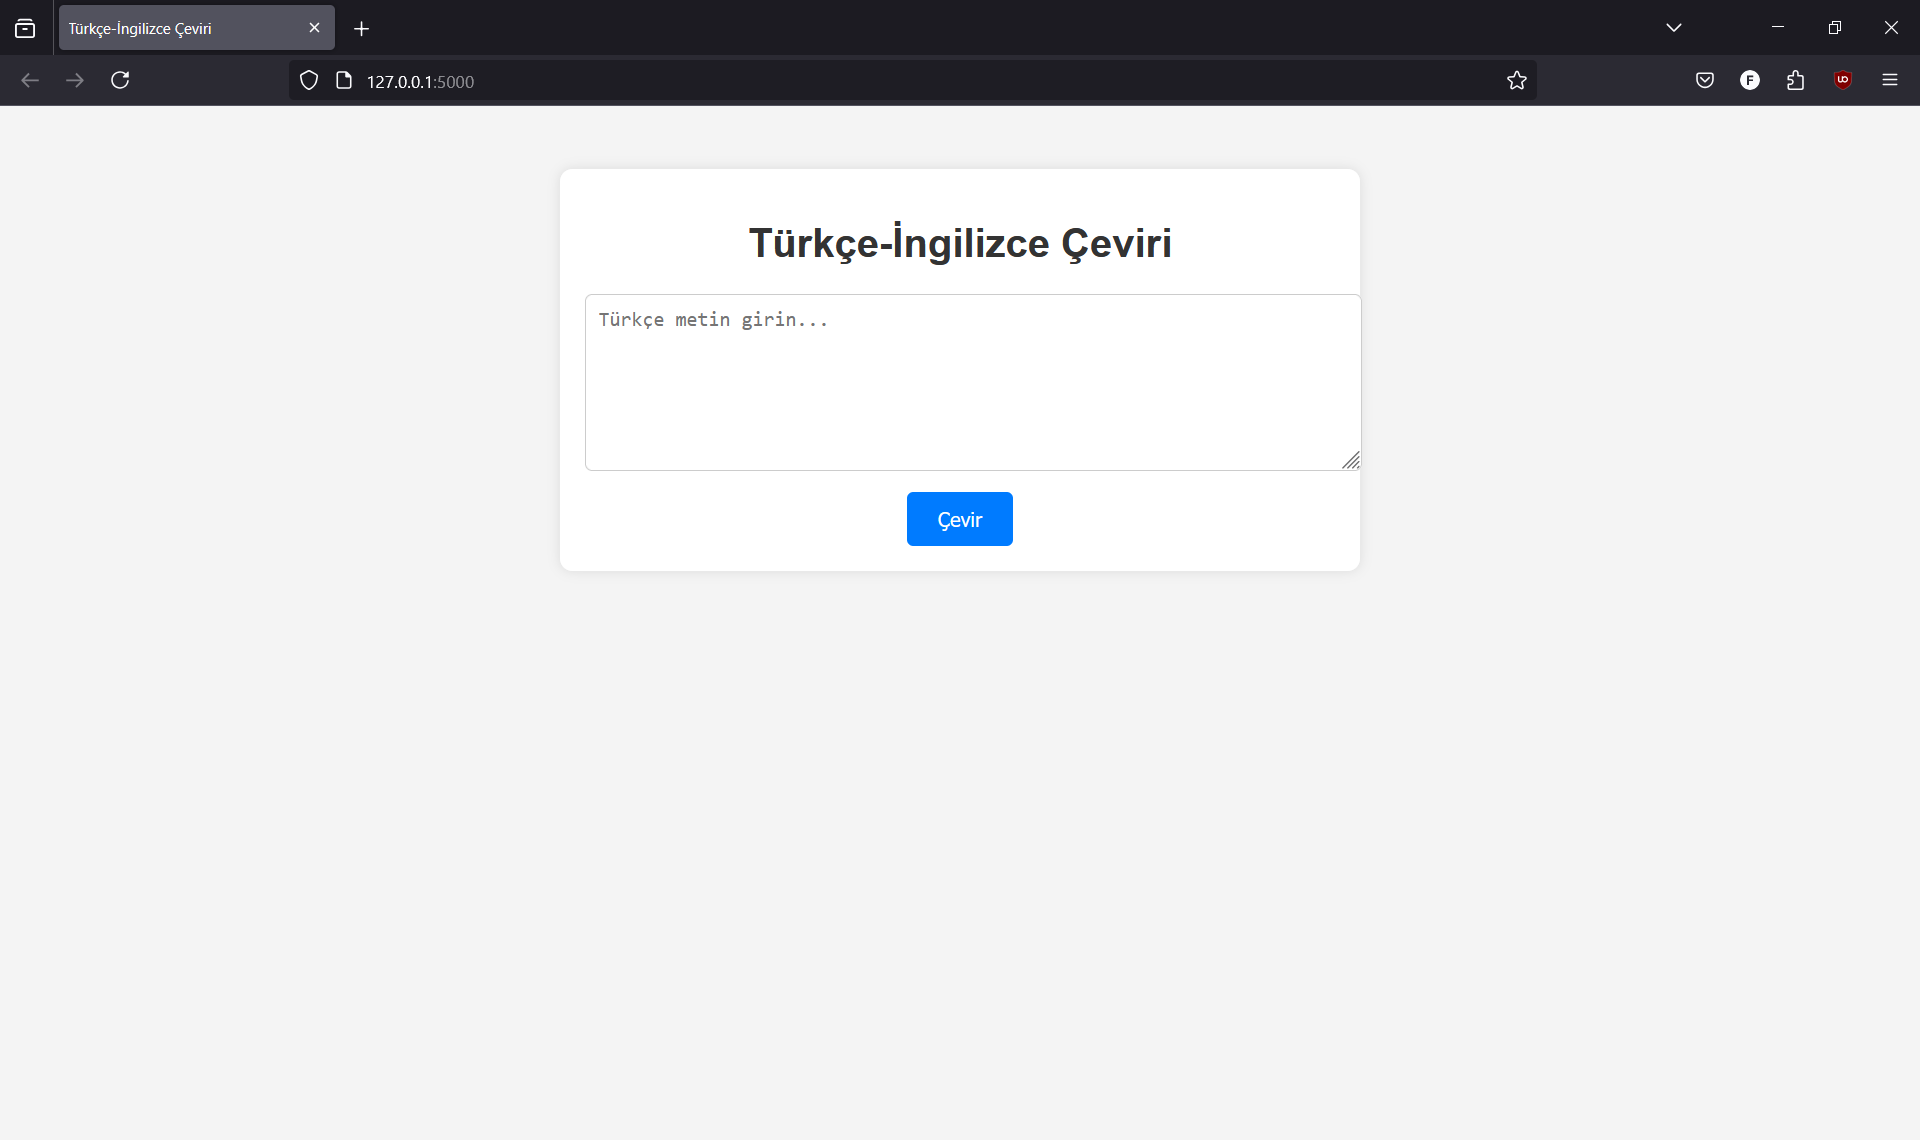
<h3 style="font-style: italic; text-align: center;">Uygulamanın giriş ekranı</h3>


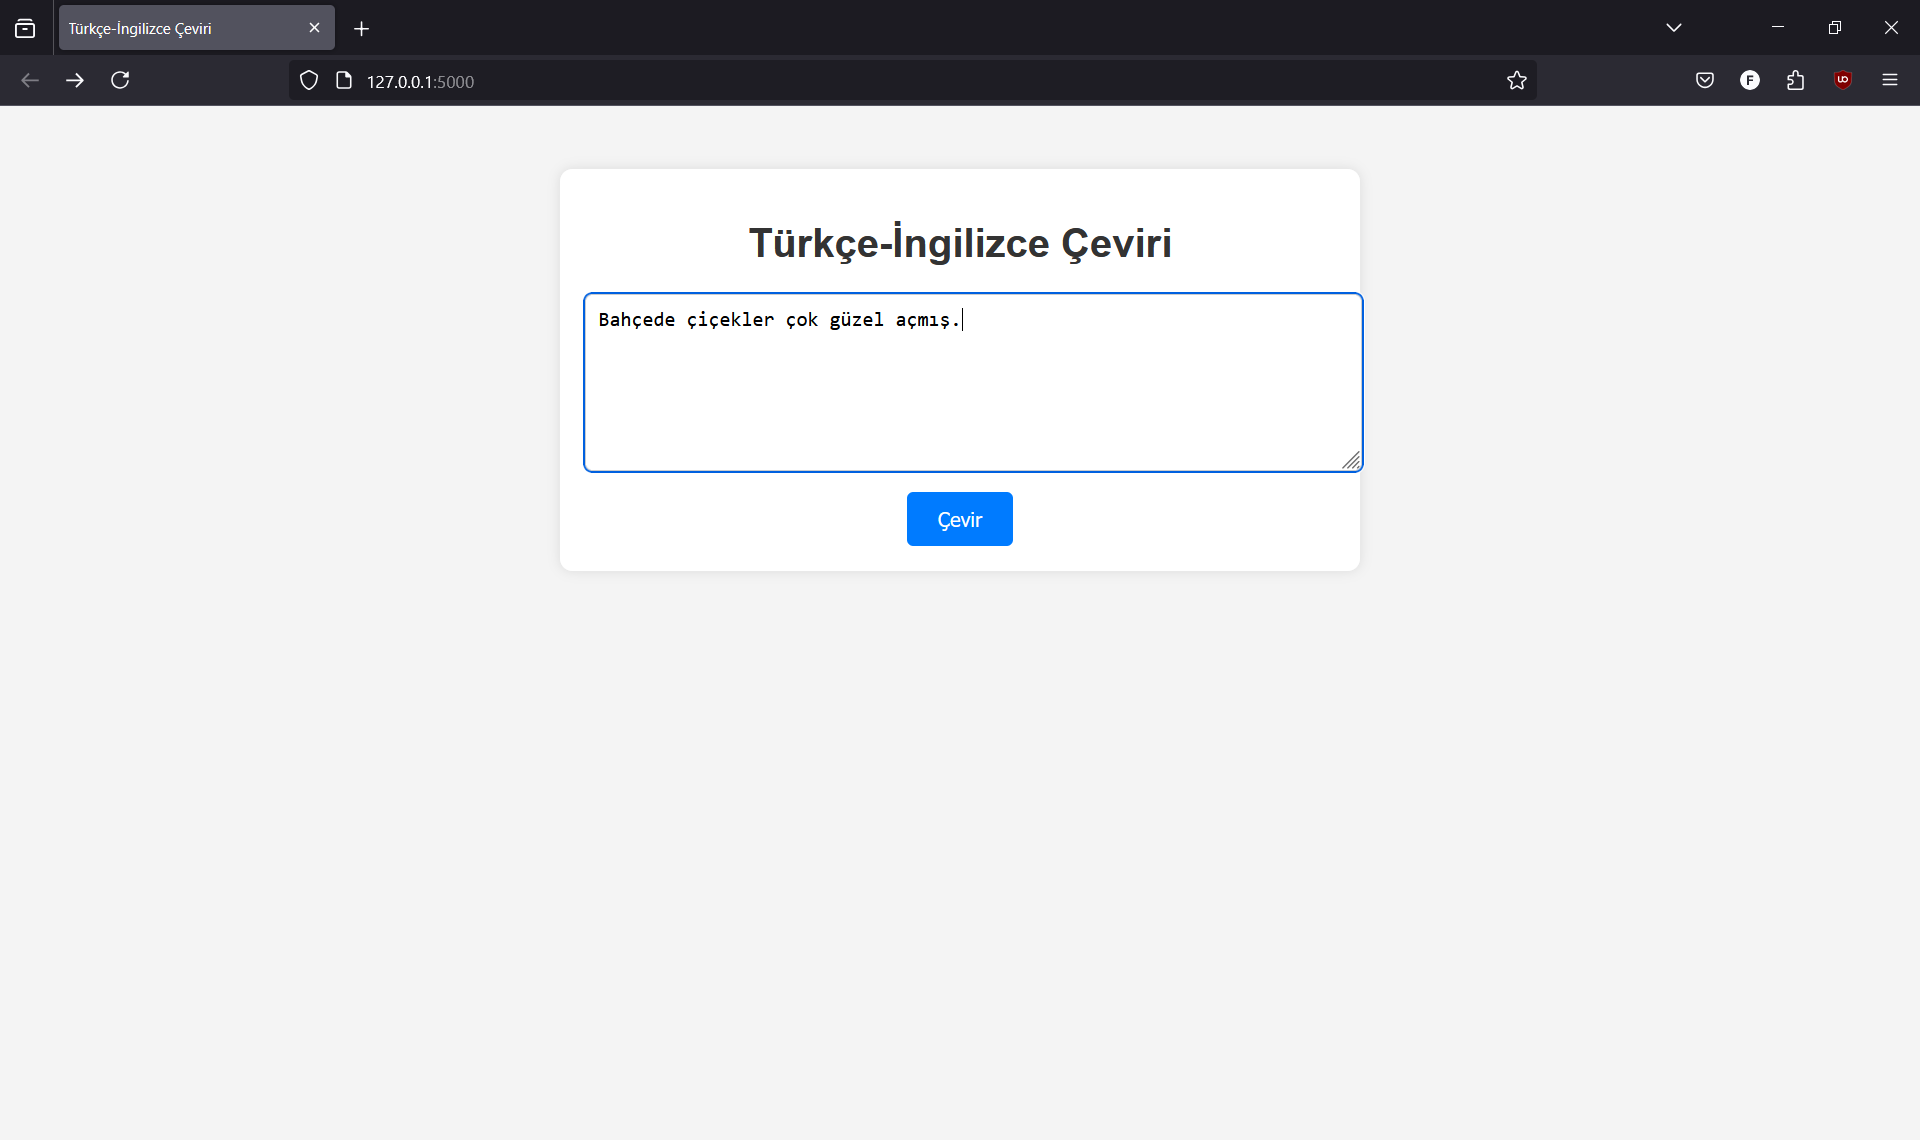
<h3 style="font-style: italic; text-align: center;">Türkçe cümle yazdığımız bölüm</h3>



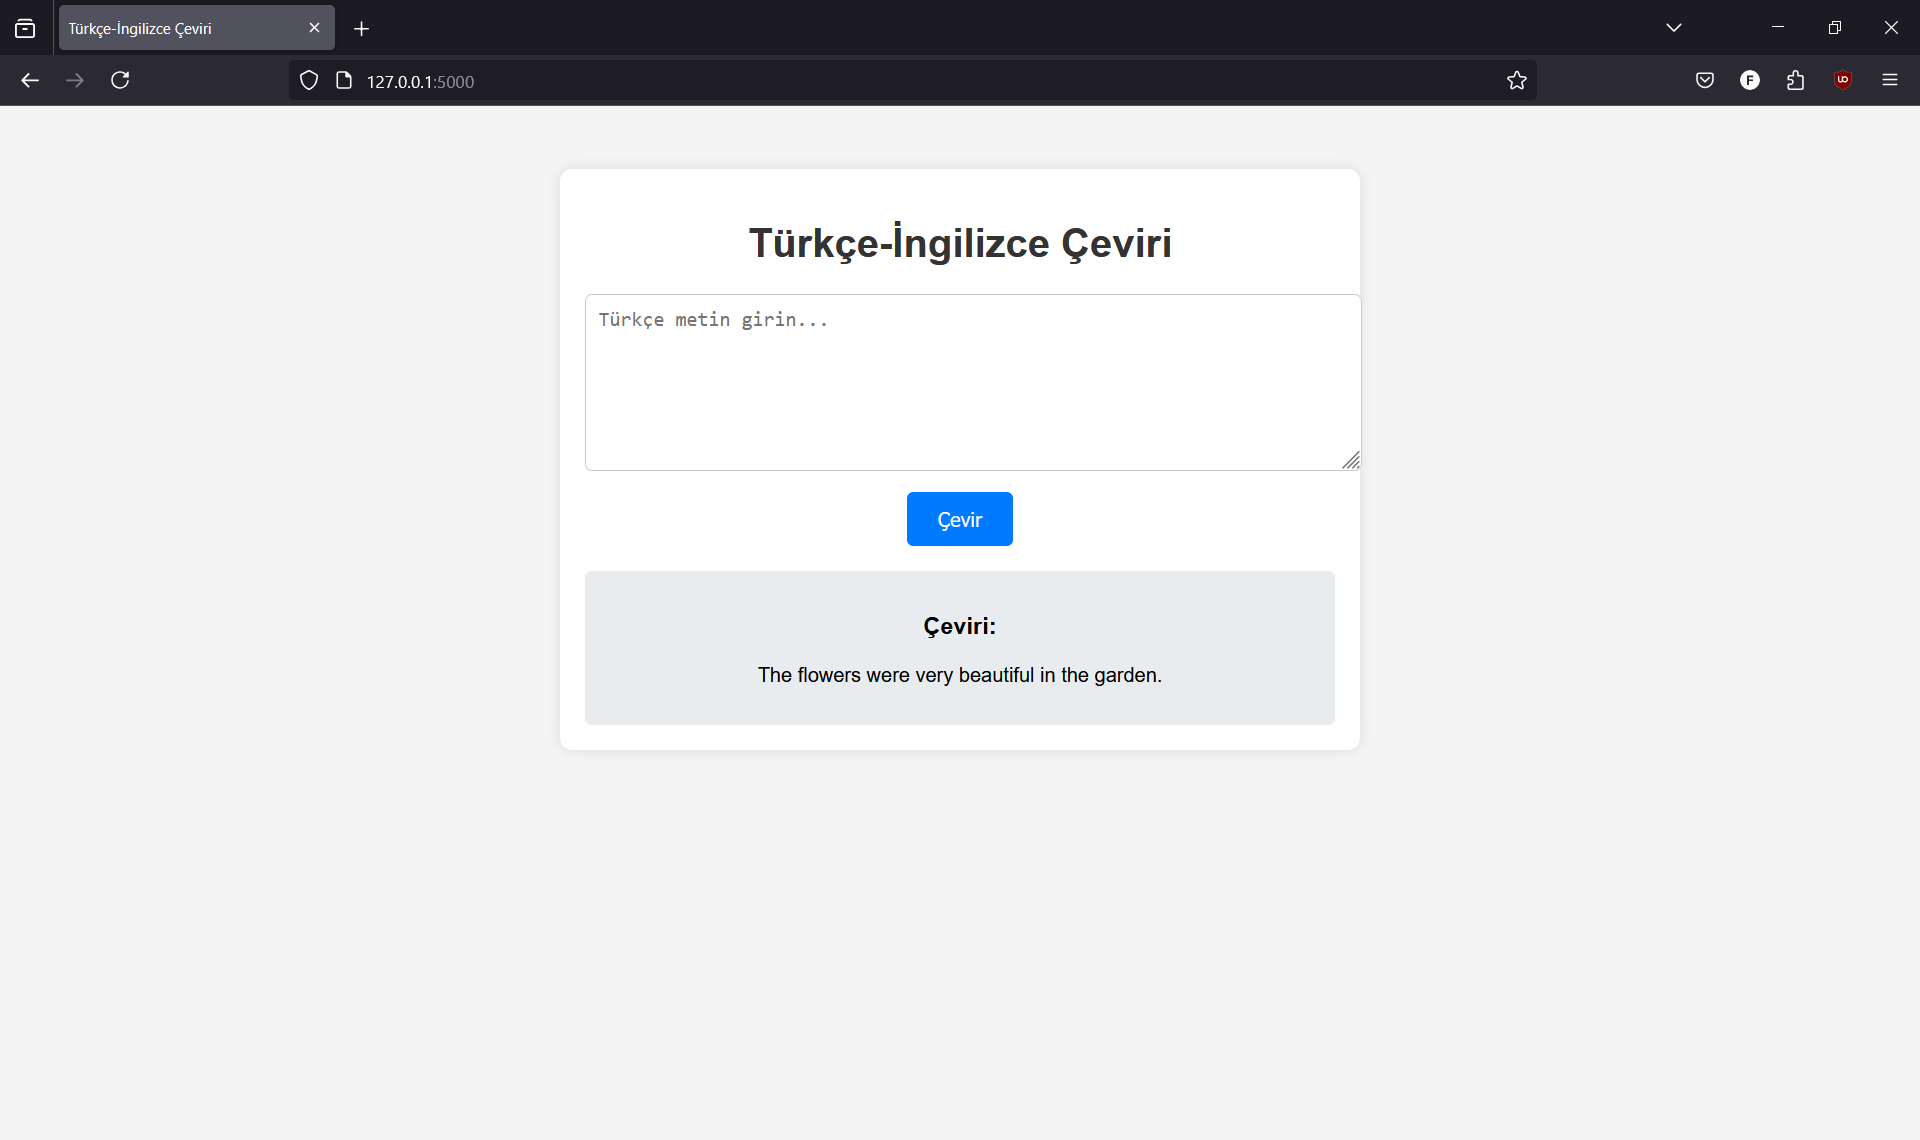
<h3 style="font-style: italic; text-align: center;">İngilizce olarak çeviri aldığımız bölüm</h3>

